# <h1 style="padding:10px; background-color:#0f4c5c; margin:0; color:white; font-family:newtimeroman; font-size:300%; text-align:center;border-radius: 25px 25px; overflow:hidden; font-weight:500">Análise de Series Temporais<br></h1>

In [161]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Alucar - Análisando as Vendas </h1>

In [162]:
alucar = pd.read_csv('dados/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [163]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [164]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [165]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [166]:
alucar.mes = pd.to_datetime(alucar.mes)

In [167]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

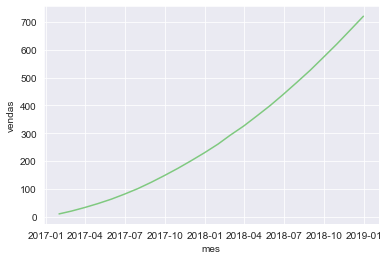

In [168]:
# dados
ax = sns.lineplot(
    data= alucar,
    x= 'mes',
    y= 'vendas')

### Aperfeiçoando o Gráfico <hr>

In [169]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

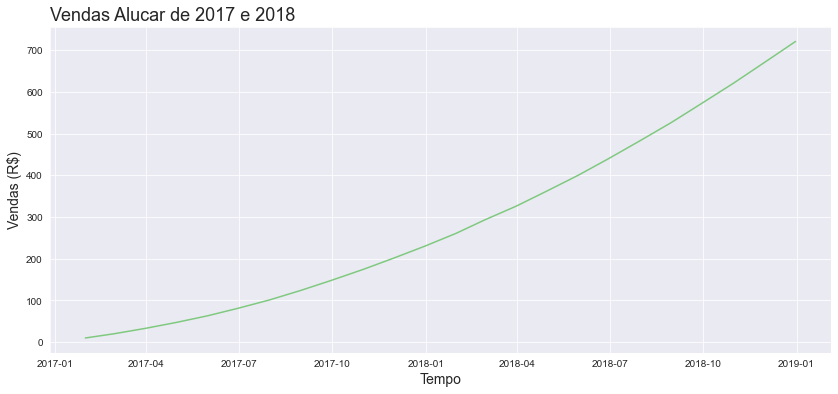

In [170]:
# dados
ax = sns.lineplot(
    data= alucar,
    x= 'mes',
    y= 'vendas')

# informações
ax.figure.set_size_inches(14,6)
ax.set_title('Vendas Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)

# demais configurações
ax = ax     # removendo os alertas do text

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Alucar - Decompondo Vendas </h1>

In [171]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [172]:
alucar['aumento'] = alucar.vendas.diff()

In [173]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


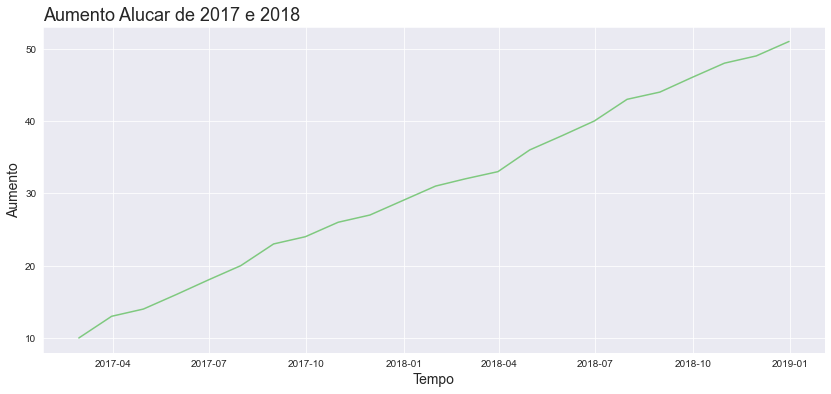

In [174]:
# dados
ax = sns.lineplot(
    data= alucar,
    x= 'mes',
    y= 'aumento')

# informações
ax.figure.set_size_inches(14,6)
ax.set_title('Aumento Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)

# demais configurações
ax = ax     # removendo os alertas do text

In [175]:
def plotar (titulo, labelx, labely, x, y, dataset):
    # dados
    ax = sns.lineplot(data= dataset, x= x, y= y)
    # informações
    ax.figure.set_size_inches(14,6)
    ax.set_title(f'{titulo} da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    # demais configuraões
    ax = ax

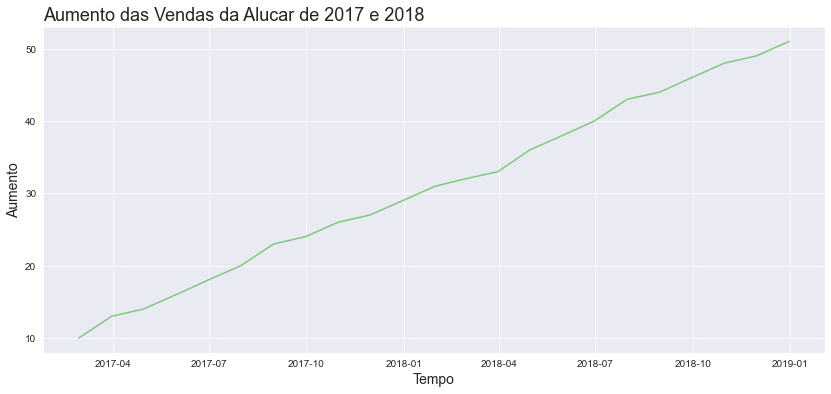

In [176]:
plotar('Aumento das Vendas', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [177]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


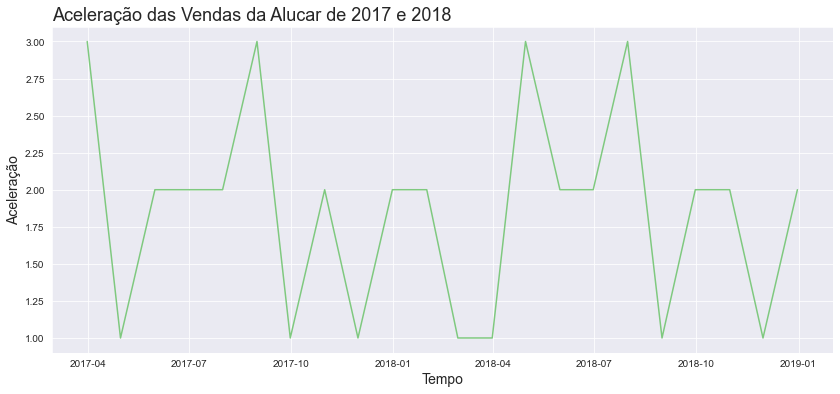

In [178]:
plotar('Aceleração das Vendas', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

### Observação e Tendências <hr>

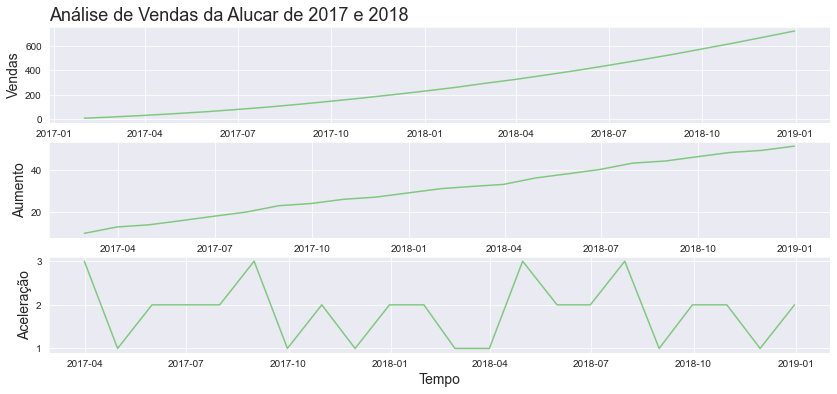

In [179]:
plt.figure(figsize=(16,12))

ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
ax = sns.lineplot(data= alucar, x= 'mes', y= 'vendas')
ax.set_ylabel('Vendas', fontsize = 14)

plt.subplot(3,1,2)
ax = sns.lineplot( data= alucar, x= 'mes', y= 'aumento')
# informações
ax.figure.set_size_inches(14,6)
ax.set_ylabel('Aumento', fontsize = 14)

plt.subplot(3,1,3)
ax = sns.lineplot(data= alucar, x= 'mes', y= 'aceleracao')
ax.set_ylabel('Aceleração', fontsize = 14)

ax.set_xlabel('Tempo', fontsize = 14)

ax = ax 


In [180]:
def comparacao (dataset, x, y1, y2, y3, titulo,xlabel, y1label, y2label, y3label):
    plt.figure(figsize=(16,12))
    
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    ax = sns.lineplot(data= dataset, x= x, y= y1)
    ax.set_ylabel(y1label, fontsize = 14)

    plt.subplot(3,1,2)
    ax = sns.lineplot( data= dataset, x= x, y= y2)
    # informações
    ax.figure.set_size_inches(14,6)
    ax.set_ylabel(y2label, fontsize = 14)

    plt.subplot(3,1,3)
    ax = sns.lineplot(data= dataset, x= x, y= y3)
    ax.set_ylabel(y3label, fontsize = 14)

    ax.set_xlabel(xlabel, fontsize = 14)

    ax = ax 


In [181]:
alucar.columns

Index(['mes', 'vendas', 'aumento', 'aceleracao'], dtype='object')

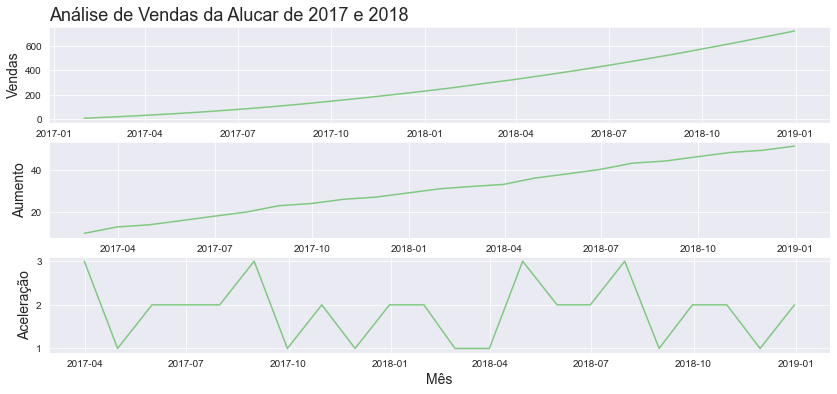

In [182]:
comparacao(
        alucar,'mes', 'vendas', 'aumento', 'aceleracao',
        'Análise de Vendas da Alucar de 2017 e 2018','Mês', 'Vendas', 'Aumento', 'Aceleração'
        )

### Gráfico de Correlação

In [183]:
from pandas.plotting import autocorrelation_plot

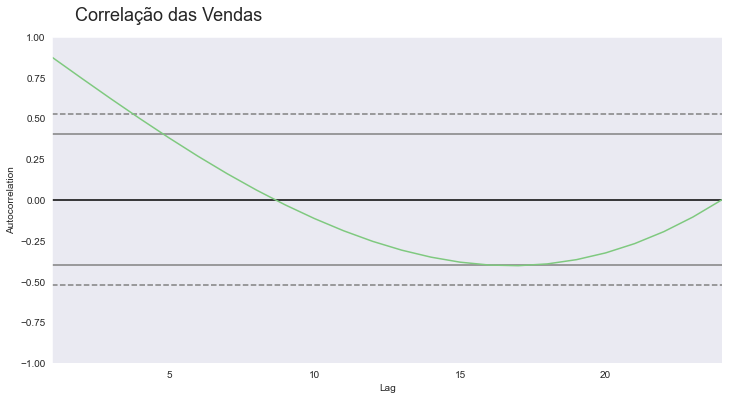

In [184]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95)

autocorrelation_plot(alucar.vendas)

ax = ax

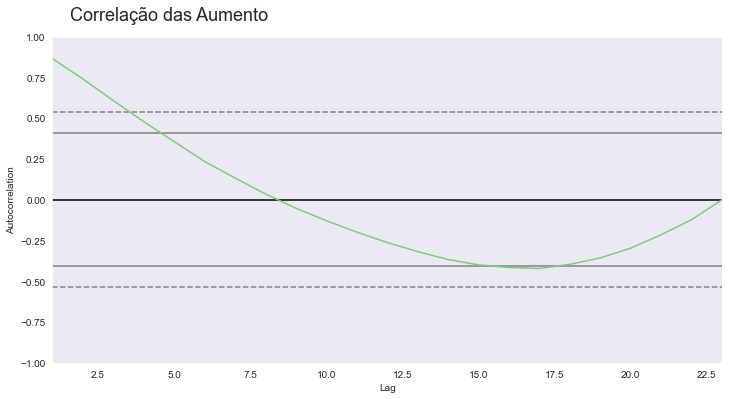

In [185]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Aumento', fontsize = 18, x = 0.26, y = 0.95)

autocorrelation_plot(alucar.aumento[1:])

ax = ax

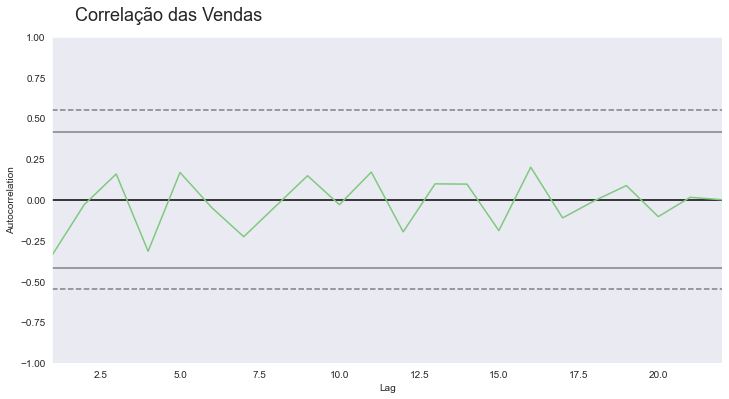

In [186]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95)

autocorrelation_plot(alucar.aceleracao[2:])

ax = ax

**Observações:**

> O valor de autocorrelação 1 ou -1 indica uma correlação perfeita.
> ou seja, com o valor 1, dizemos que existe uma correlação perfeita positiva e -1, uma correlação perfeita negativa.

> O valor de autocorrelação entre 0,7 e 0,9, indica que temos uma correlação forte.
> ou seja, quanto mais próximo do valor 1 ou -1, dizemos que temos uma correlação forte.

> O valor de autocorrelação 0 indica uma correlação nula.
> obs: Lembrando que correlação não é o mesmo que causa e efeito.

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Alucar - Analisando Assinantes da Newsletter </h1>

In [187]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [188]:
print(f'Quantidade de linhas e colunas: {assinantes.shape}')

Quantidade de linhas e colunas: (24, 2)


In [189]:
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [190]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [191]:
assinantes.mes = pd.to_datetime(assinantes.mes)

In [192]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [193]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [194]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


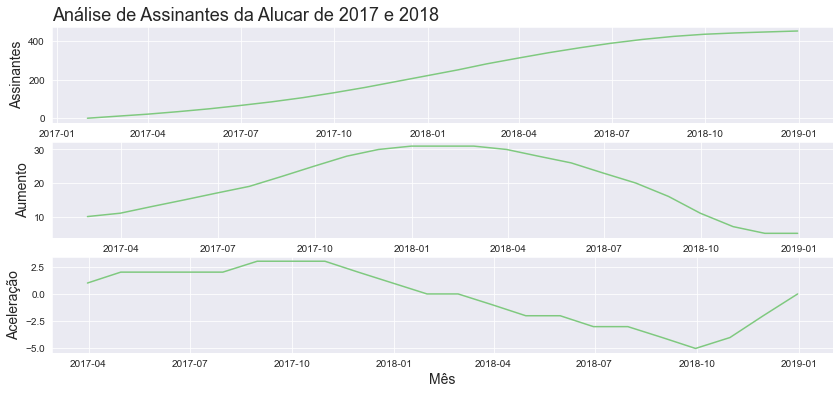

In [195]:
comparacao(
        assinantes,'mes', 'assinantes', 'aumento', 'aceleracao',
        'Análise de Assinantes da Alucar de 2017 e 2018','Mês', 'Assinantes', 'Aumento', 'Aceleração')

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Chocolura - Análise </h1>

In [196]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [197]:
print(f'Quantidade de linhas e colunas: {chocolura.shape}')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')
chocolura.mes = pd.to_datetime(chocolura.mes)

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [198]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [199]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

In [200]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


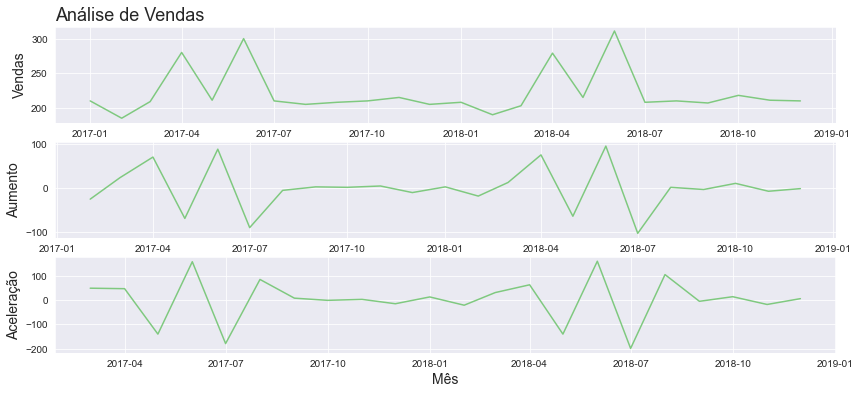

In [201]:
comparacao(
        chocolura,'mes', 'vendas', 'aumento', 'aceleracao',
        'Análise de Vendas','Mês', 'Vendas', 'Aumento', 'Aceleração')

### Investigando vendas Diárias <hr>

In [202]:
chocolura_vendas_diarias = pd.read_csv('dados/vendas_por_dia.csv')
chocolura_vendas_diarias.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [203]:
print(f'Quantidade de linhas e colunas: {chocolura_vendas_diarias.shape}')
print(f'Quantidade de dados nulos: {chocolura_vendas_diarias.isna().sum().sum()}')
chocolura_vendas_diarias.dia = pd.to_datetime(chocolura_vendas_diarias.dia)

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [204]:
chocolura_vendas_diarias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [205]:
chocolura_vendas_diarias['aumento'] = chocolura_vendas_diarias.vendas.diff()
chocolura_vendas_diarias['aceleracao'] = chocolura_vendas_diarias.aumento.diff()
chocolura_vendas_diarias.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


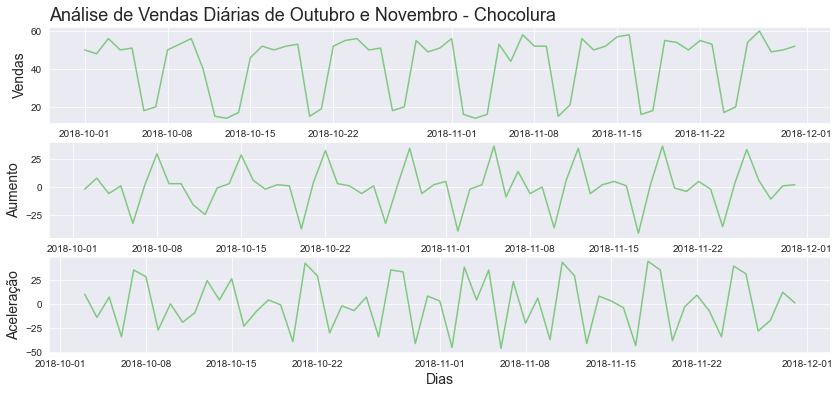

In [206]:
comparacao(
        chocolura_vendas_diarias,'dia', 'vendas', 'aumento', 'aceleracao',
        'Análise de Vendas Diárias de Outubro e Novembro - Chocolura',
        'Dias', 'Vendas', 'Aumento', 'Aceleração')
        

### Análisando a Sazonalidade <hr>

In [207]:
chocolura_vendas_diarias['dia_da_semana'] = chocolura_vendas_diarias['dia'].dt.day_name()

In [208]:
chocolura_vendas_diarias.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [209]:
chocolura_vendas_diarias.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [210]:
dias_traduzidos = {
    'Monday': 'Segunda',
    'Tuesday' : 'Terça',
    'Wednesday':'Quarta',
    'Thursday':'Quinta',
    'Friday':'Sexta',
    'Saturday':'Sábado',
    'Sunday':'Domingo'}

In [211]:
chocolura_vendas_diarias.dia_da_semana = chocolura_vendas_diarias.dia_da_semana.map(dias_traduzidos)
chocolura_vendas_diarias

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terça
58,2018-11-28,49,-11.0,-17.0,Quarta
59,2018-11-29,50,1.0,12.0,Quinta


In [212]:
vendas_agrupadas = chocolura_vendas_diarias.groupby('dia_da_semana').mean().round(2)
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,18.88,3.00,30.75
Quarta,53.11,1.44,2.11
Quinta,51.33,-1.78,-3.22
Segunda,52.33,33.75,30.75
Sexta,44.56,-6.78,-5.00
Sábado,15.88,-27.75,-19.88
Terça,51.67,-0.67,-34.25


### Chocolura - Correlação das Vendas Diárias <hr>

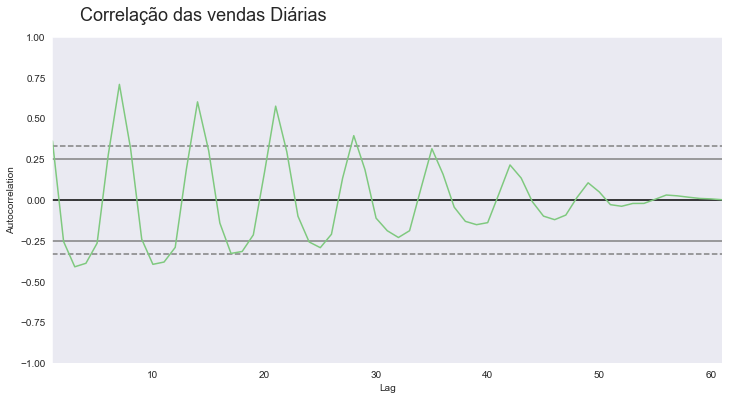

In [213]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas Diárias', fontsize = 18, x= 0.3, y = 0.95)

autocorrelation_plot(chocolura_vendas_diarias.vendas)

ax = ax

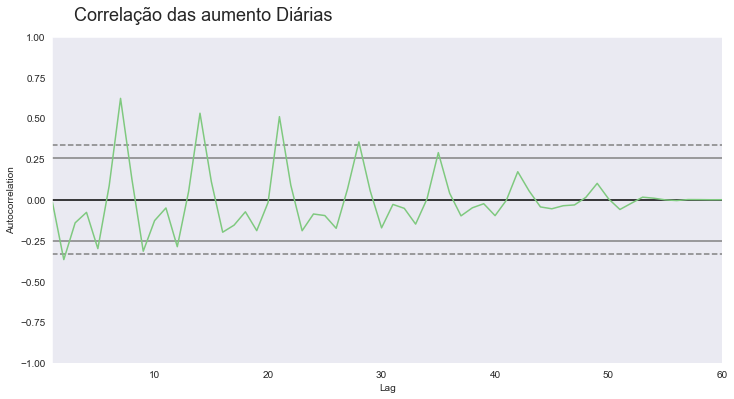

In [214]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das aumento Diárias', fontsize = 18, x= 0.3, y = 0.95)

autocorrelation_plot(chocolura_vendas_diarias.aumento[1:])

ax = ax

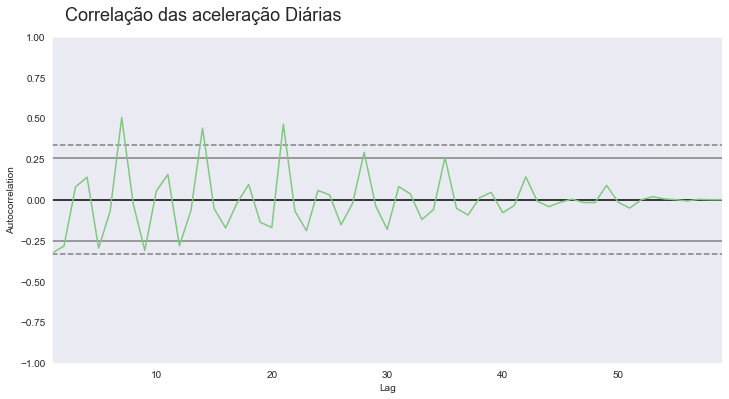

In [215]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das aceleração Diárias', fontsize = 18, x= 0.3, y = 0.95)

autocorrelation_plot(chocolura_vendas_diarias.aceleracao[2:])

ax = ax

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Cafelura - Análise </h1>

In [216]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [217]:
print(f'Quantidade de linhas e colunas: {cafelura.shape}')
print(f'Quantidade de dados nulos: {cafelura.isna().sum().sum()}')
cafelura.mes = pd.to_datetime(cafelura.mes)

display(cafelura.info())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


None

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


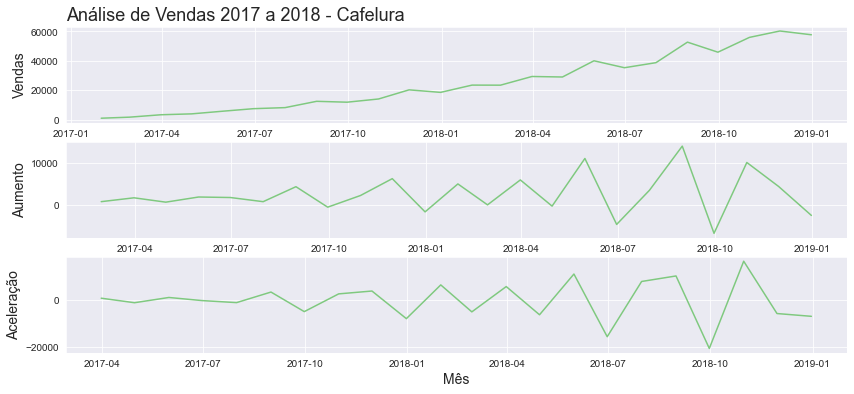

In [218]:
cafelura['aumento'] = cafelura.vendas.diff()
cafelura['aceleracao'] = cafelura.aumento.diff()
display(cafelura.head())


comparacao(
        cafelura,'mes', 'vendas', 'aumento', 'aceleracao',
        'Análise de Vendas 2017 a 2018 - Cafelura',
        'Mês', 'Vendas', 'Aumento', 'Aceleração')
        

In [219]:
quantidade_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [220]:
quantidade_dias_de_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [221]:
cafelura['vendas_normalizadas'] = cafelura.vendas / quantidade_dias_de_fds.quantidade_de_dias.values
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


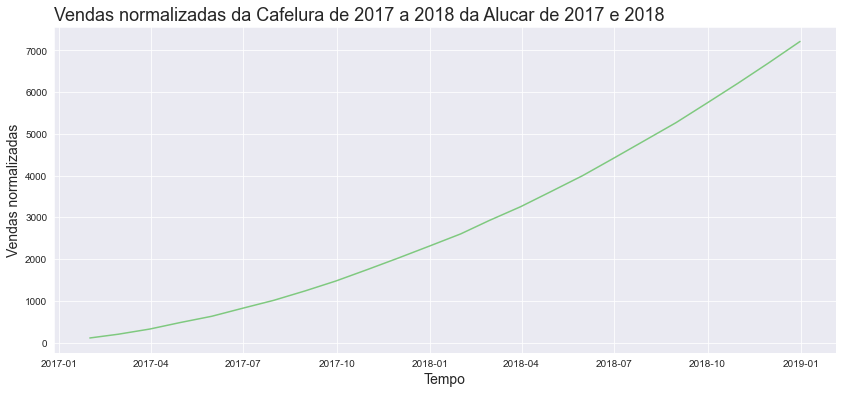

In [222]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018',
'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

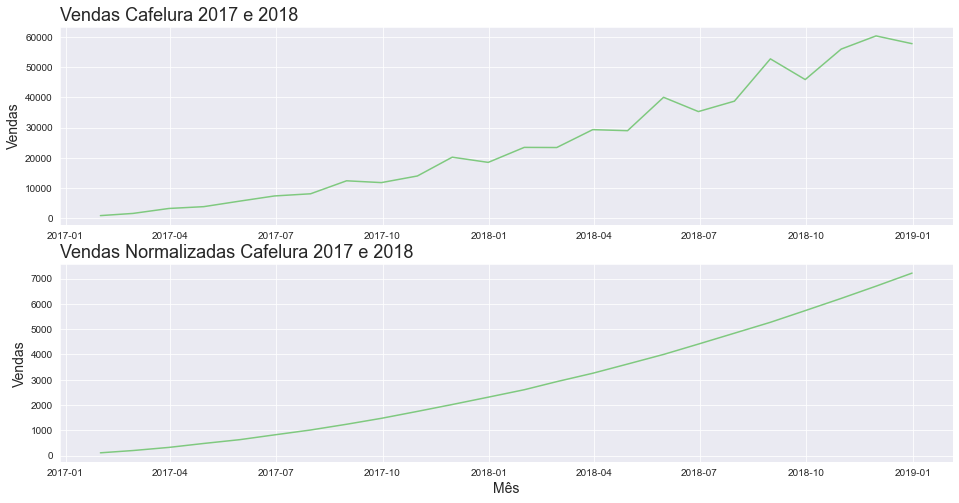

In [223]:
plt.figure(figsize=(16,8))

ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(data=cafelura, x='mes', y='vendas')
ax.set_ylabel('Vendas', fontsize = 14)
ax.set_xlabel(' ', fontsize = 20)


ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18,  loc = 'left')
sns.lineplot(data=cafelura, x='mes', y='vendas_normalizadas')
ax.set_ylabel('Vendas', fontsize = 14)
ax.set_xlabel('Mês', fontsize = 14)

ax = ax

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Statsmodels </h1>

In [224]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [225]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   mes                  24 non-null     datetime64[ns]
 1   vendas               24 non-null     int64         
 2   aumento              23 non-null     float64       
 3   aceleracao           22 non-null     float64       
 4   vendas_normalizadas  24 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.1 KB


In [226]:
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


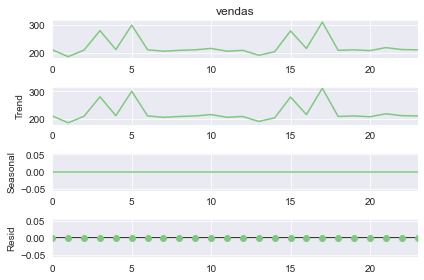

In [227]:
resultado = seasonal_decompose(chocolura.vendas, period= 1)
ax = resultado.plot()

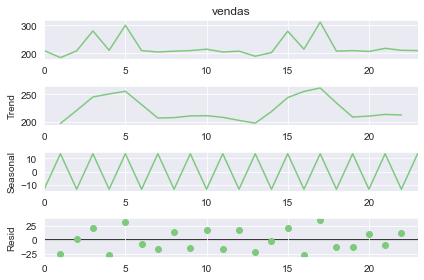

In [228]:
resultado = seasonal_decompose(chocolura.vendas, period= 2)
ax = resultado.plot()

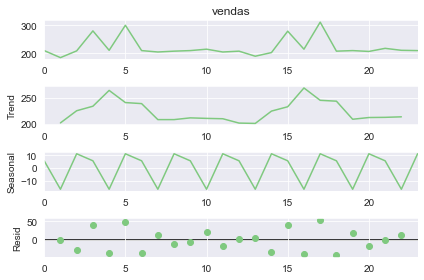

In [229]:
resultado = seasonal_decompose(chocolura.vendas, period= 3)
ax = resultado.plot()

In [230]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [231]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()


,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


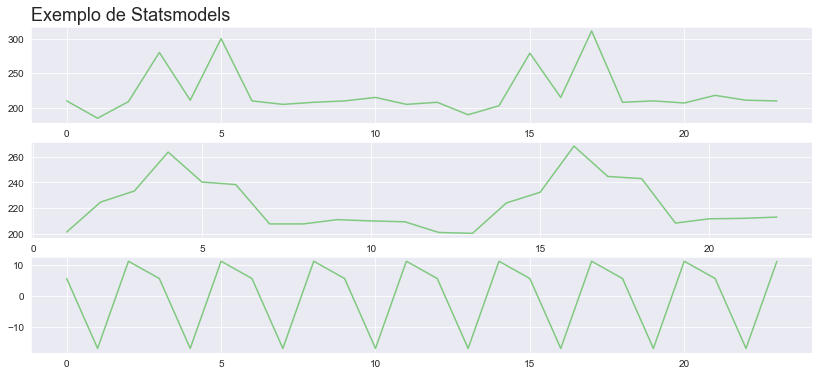

In [232]:
comparacao(
        resultado, resultado.index, 'observacao', 'tendencia', 'sazonalidade',
        'Exemplo de Statsmodels',
        '', '', '', '')

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Alucel - Análise </h1>

In [233]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [234]:
print(f'Quantidade de linhas e colunas: {alucel.shape}')
print(f'Quantidade de dados nulos: {alucel.isna().sum().sum()}\n')
alucel.dia	 = pd.to_datetime(alucel.dia)

display(alucel.info())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


None

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


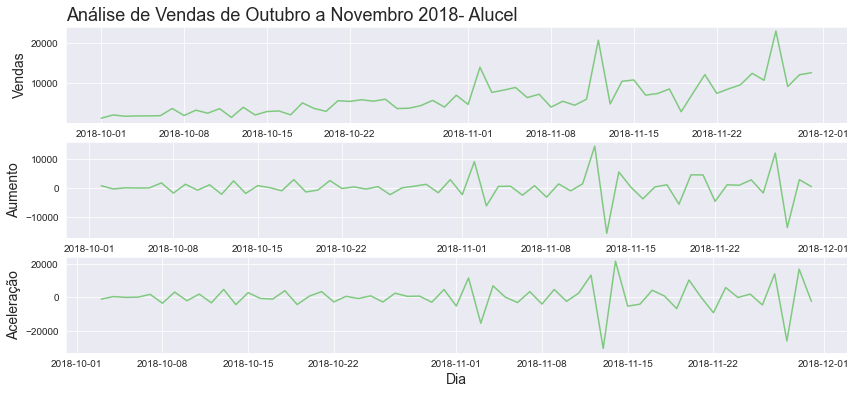

In [235]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
display(alucel.head())


comparacao(
        alucel,'dia', 'vendas', 'aumento', 'aceleracao',
        'Análise de Vendas de Outubro a Novembro 2018- Alucel',
        'Dia', 'Vendas', 'Aumento', 'Aceleração')
        

### Médias Móvel <hr>

In [236]:
alucel['media_movel_7'] = alucel.vendas.rolling(7).mean()

In [237]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel_7
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


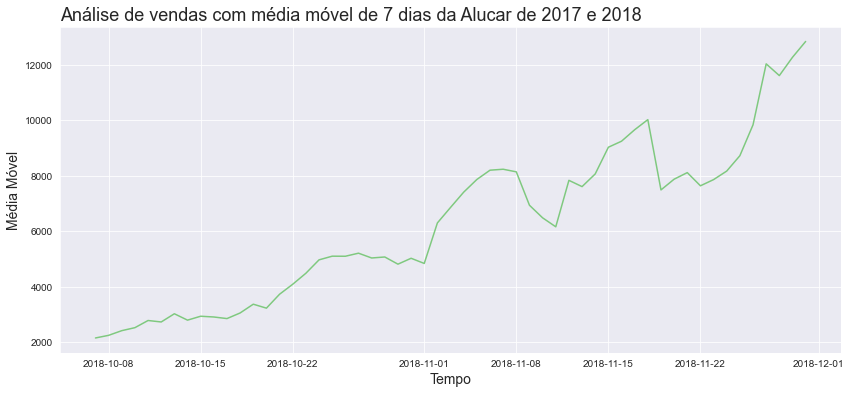

In [241]:
plotar(
    'Análise de vendas com média móvel de 7 dias',
    'Tempo', 'Média Móvel',
    'dia', 'media_movel_7', alucel)

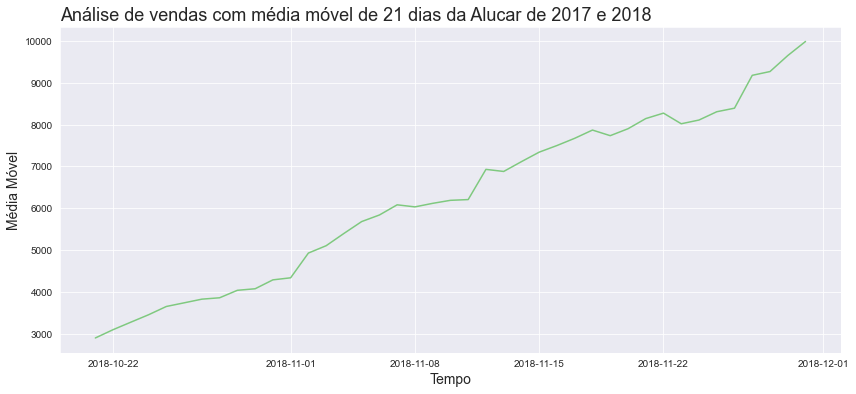

In [239]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()
plotar(
    'Análise de vendas com média móvel de 21 dias',
    'Tempo', 'Média Móvel',
    'dia', 'media_movel_21', alucel)

In [245]:
alucel.columns

Index(['dia', 'vendas', 'aumento', 'aceleracao', 'media_movel_7',
       'media_movel_21'],
      dtype='object')

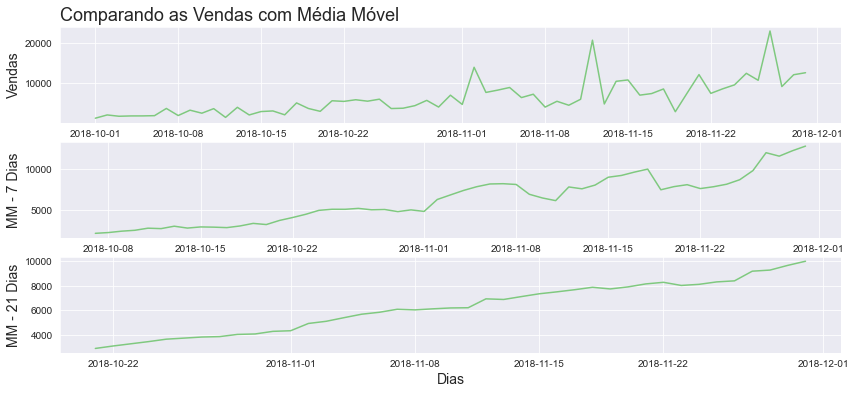

In [249]:
comparacao(
        alucel, 'dia', 'vendas', 'media_movel_7', 'media_movel_21',
        'Comparando as Vendas com Média Móvel',
        'Dias', 'Vendas', 'MM - 7 Dias', 'MM - 21 Dias')